In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df = pd.read_excel('/content/dados_credito.xlsx')

# Data Visualization

In [7]:
df.shape

(10476, 17)

In [8]:
df.head()

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
0,1,SP,19,Superior Cursando,Solteiro,0,Não,0,0,Não,0,8,Sim,1800,0,0,12.000000
1,2,MG,23,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800,1,50000,18.000000
2,3,SC,25,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23.000000
3,4,PR,27,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,28.666667
4,5,RJ,28,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,NaN,1,35000,34.166667


In [9]:
df.tail()

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
10471,10472,PR,51,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800,1,50000,18.000000
10472,10473,SP,48,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23.000000
10473,10474,RJ,51,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,28.666667
10474,10475,RJ,48,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,NaN,1,35000,34.166667
10475,10476,PR,51,Segundo Grau Completo,Divorciado,0,Não,0,0,Não,0,14,Sim,3100,2,40000,39.666667


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CODIGO_CLIENTE              10476 non-null  int64  
 1   UF                          10476 non-null  object 
 2   IDADE                       10476 non-null  int64  
 3   ESCOLARIDADE                10476 non-null  object 
 4   ESTADO_CIVIL                10476 non-null  object 
 5   QT_FILHOS                   10476 non-null  int64  
 6   CASA_PROPRIA                10476 non-null  object 
 7   QT_IMOVEIS                  10476 non-null  int64  
 8   VL_IMOVEIS                  10476 non-null  int64  
 9   OUTRA_RENDA                 10476 non-null  object 
 10  OUTRA_RENDA_VALOR           10476 non-null  int64  
 11  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 12  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 13  ULTIMO_SALARIO              104

# Data Cleaning

excluded useless variable

In [11]:
df.drop('CODIGO_CLIENTE', axis=1, inplace=True)

In [12]:
df.groupby(['ULTIMO_SALARIO']).size()

,0
ULTIMO_SALARIO,
1800,846
2200,792
3100,792
3900,792
4500,468
4800,792
5300,522
6100,522
6800,611


In [13]:
df.loc[df['ULTIMO_SALARIO'] == 'SEM DADOS']

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
10459,RJ,45,Superior Cursando,Solteiro,1,Sim,1,185000,Sim,3000,19,Sim,SEM DADOS,0,0,45.166667


In [14]:
df.replace('SEM DADOS', np.nan, inplace=True)

In [15]:
df['ULTIMO_SALARIO'] = df['ULTIMO_SALARIO'].astype(np.float64)

In [16]:
df.isnull().sum()

,0
UF,0
IDADE,0
ESCOLARIDADE,0
ESTADO_CIVIL,0
QT_FILHOS,0
CASA_PROPRIA,0
QT_IMOVEIS,0
VL_IMOVEIS,0
OUTRA_RENDA,0
OUTRA_RENDA_VALOR,0


In [17]:
df['ULTIMO_SALARIO'] = df['ULTIMO_SALARIO'].fillna((df['ULTIMO_SALARIO'].median()))

In [18]:
df.isnull().sum()

,0
UF,0
IDADE,0
ESCOLARIDADE,0
ESTADO_CIVIL,0
QT_FILHOS,0
CASA_PROPRIA,0
QT_IMOVEIS,0
VL_IMOVEIS,0
OUTRA_RENDA,0
OUTRA_RENDA_VALOR,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10476 non-null  object 
 1   IDADE                       10476 non-null  int64  
 2   ESCOLARIDADE                10476 non-null  object 
 3   ESTADO_CIVIL                10476 non-null  object 
 4   QT_FILHOS                   10476 non-null  int64  
 5   CASA_PROPRIA                10476 non-null  object 
 6   QT_IMOVEIS                  10476 non-null  int64  
 7   VL_IMOVEIS                  10476 non-null  int64  
 8   OUTRA_RENDA                 10476 non-null  object 
 9   OUTRA_RENDA_VALOR           10476 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 12  ULTIMO_SALARIO              10476 non-null  float64
 13  QT_CARROS                   104

In [20]:
df.describe()

,IDADE,QT_FILHOS,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
count,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000
mean,41.054124,1.122566,0.847079,238453.608247,641.237113,43.070447,8286.531119,0.936426,40996.563574,51.058706
std,13.878162,1.113537,0.957374,265843.934416,1295.978195,40.851521,5826.589775,0.806635,47404.214062,27.306340
min,19.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1800.000000,0.000000,0.000000,12.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,14.000000,3900.000000,0.000000,0.000000,28.666667
50%,42.000000,1.000000,1.000000,185000.000000,0.000000,22.000000,6100.000000,1.000000,35000.000000,45.166667
75%,53.000000,2.000000,1.000000,370000.000000,0.000000,75.000000,11500.000000,2.000000,50000.000000,72.666667
max,65.000000,42.000000,3.000000,900000.000000,4000.000000,150.000000,22000.000000,2.000000,180000.000000,98.000000


In [21]:
numerical_variables = []

In [22]:
for i in df.columns[0:48].tolist():
    if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
        print(i, ':', df.dtypes[i])
        numerical_variables.append(i)

IDADE : int64
QT_FILHOS : int64
QT_IMOVEIS : int64
VL_IMOVEIS : int64
OUTRA_RENDA_VALOR : int64
TEMPO_ULTIMO_EMPREGO_MESES : int64
ULTIMO_SALARIO : float64
QT_CARROS : int64
VALOR_TABELA_CARROS : int64
SCORE : float64


In [23]:
numerical_variables

['IDADE',
 'QT_FILHOS',
 'QT_IMOVEIS',
 'VL_IMOVEIS',
 'OUTRA_RENDA_VALOR',
 'TEMPO_ULTIMO_EMPREGO_MESES',
 'ULTIMO_SALARIO',
 'QT_CARROS',
 'VALOR_TABELA_CARROS',
 'SCORE']

# **Graphics**

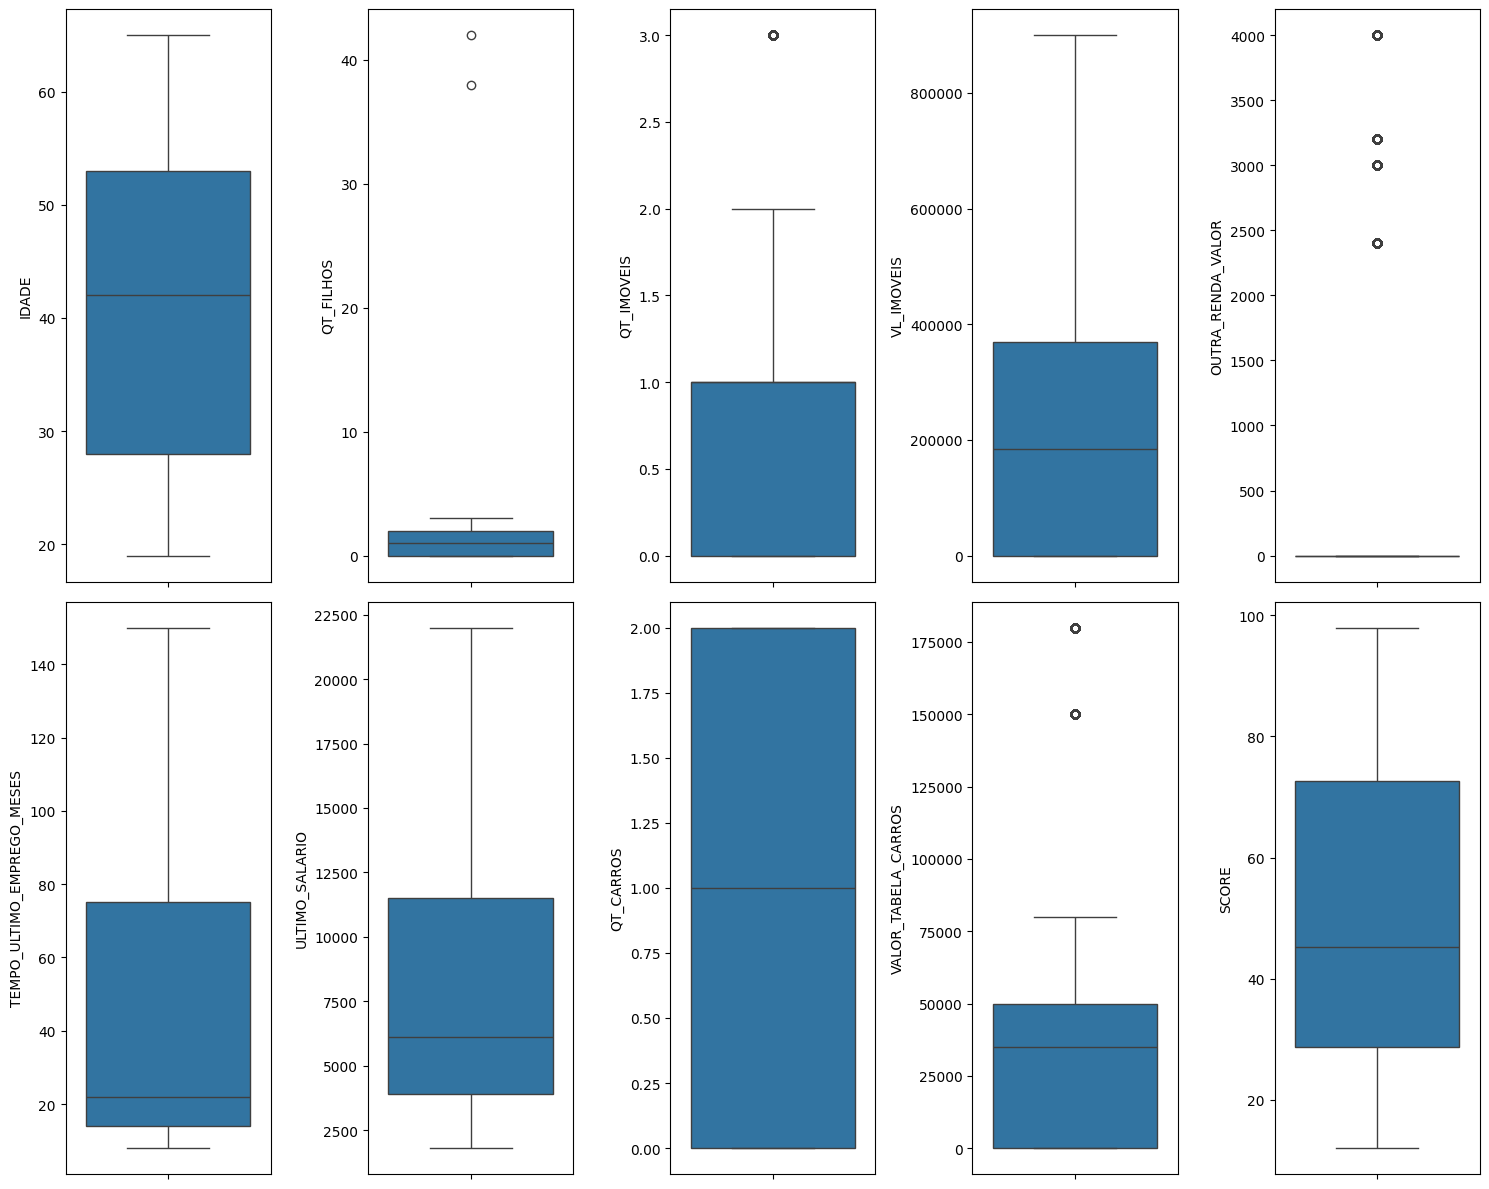

In [24]:
plt.rcParams['figure.figsize'] = [15.00, 12.00]
plt.rcParams['figure.autolayout'] = True

f, axes = plt.subplots(2, 5)

row = 0
column = 0

for i in numerical_variables:
    sns.boxplot(data = df, y=i, ax=axes[row][column])
    column += 1
    if column == 5:
        row += 1
        column = 0

plt.show()

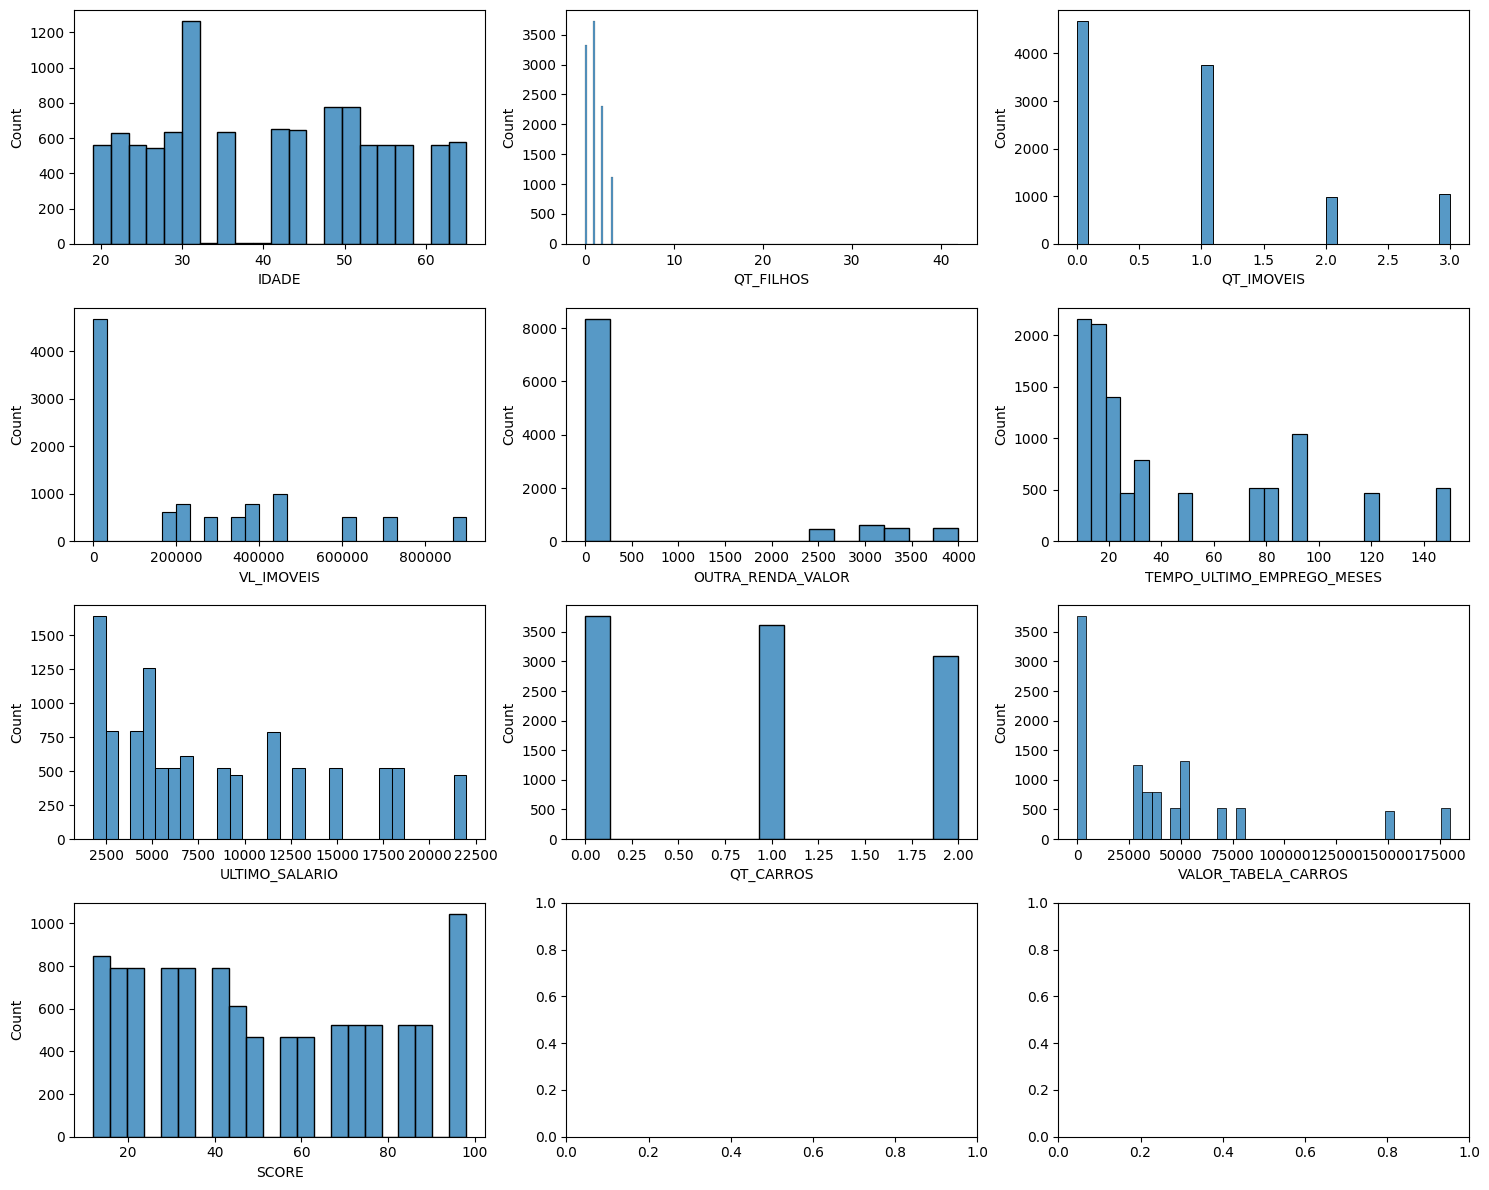

In [25]:
plt.rcParams['figure.figsize'] = [15.00, 12.00]
plt.rcParams['figure.autolayout'] = True

f, axes = plt.subplots(4, 3)

row = 0
column = 0

for i in numerical_variables:
    sns.histplot(data=df, x=i, ax=axes[row][column])
    column += 1
    if column == 3:
        row += 1
        column = 0

plt.show()

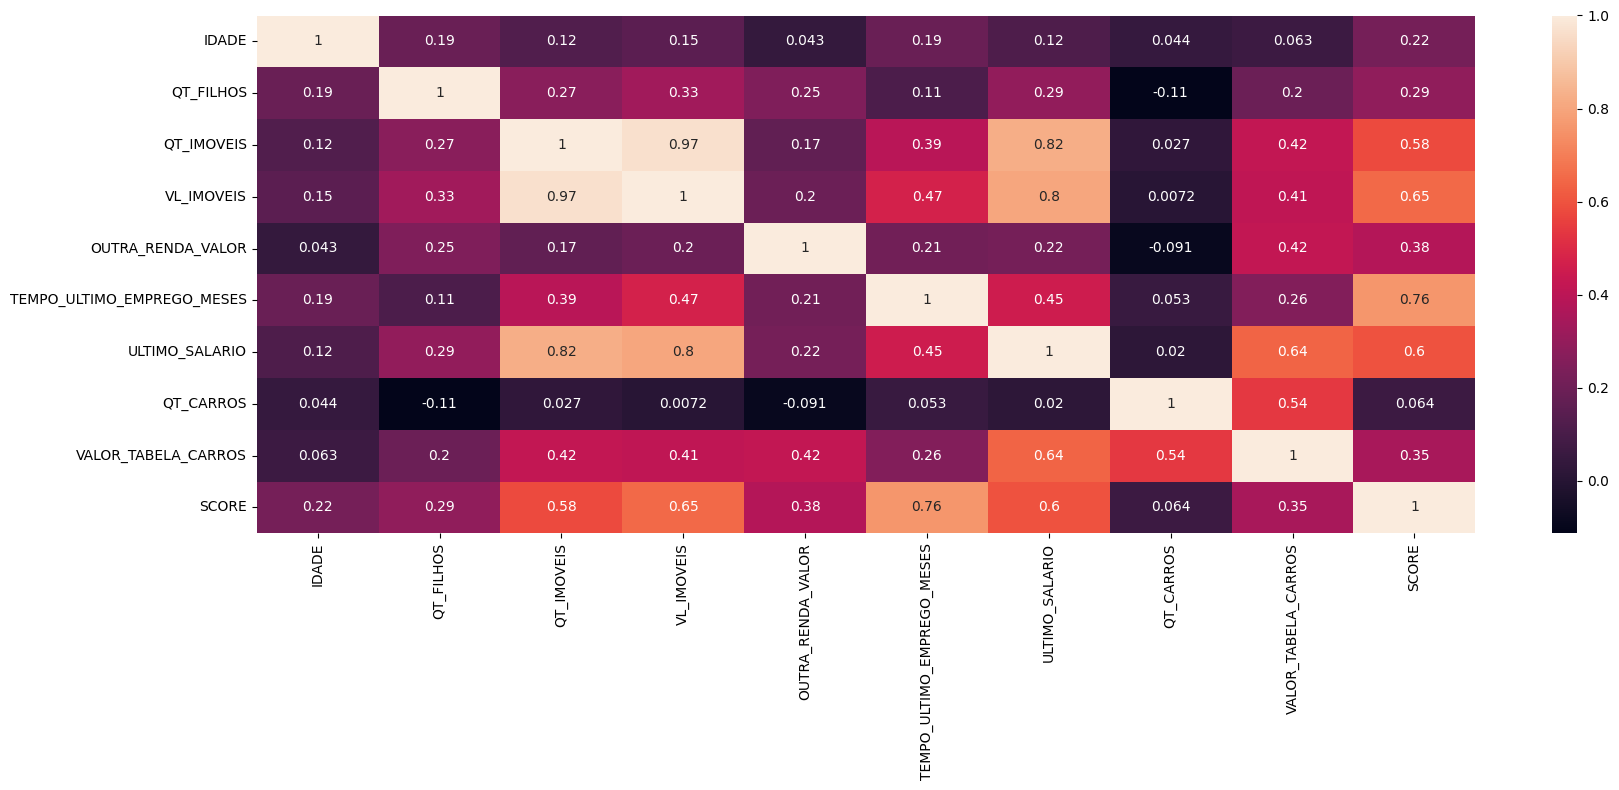

In [26]:
df_numeric = df.select_dtypes(include='number')

plt.rcParams['figure.figsize'] = (18, 8)
ax = sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

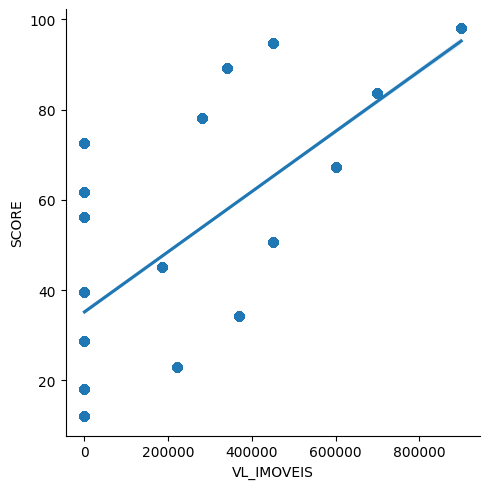

In [27]:
sns.lmplot(x='VL_IMOVEIS', y='SCORE', data=df)

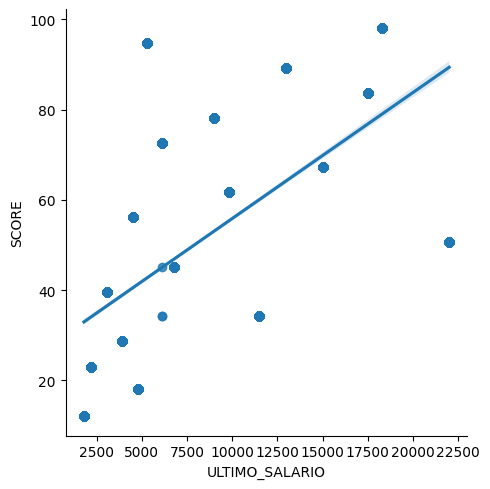

In [28]:
sns.lmplot(x='ULTIMO_SALARIO', y='SCORE', data=df)

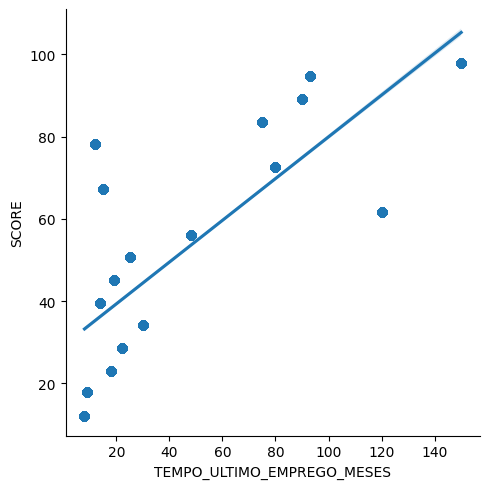

In [29]:
sns.lmplot(x='TEMPO_ULTIMO_EMPREGO_MESES', y='SCORE', data=df)

# **Feature Engineering**

In [30]:
age_bins = [0, 30, 40, 50, 60]
age_category = ['Até 30', '31 a 40', '41 a 50', 'Maior que 50']

df['FAIXA_ETARIA'] = pd.cut(df['IDADE'], age_bins, labels=age_category)
df['FAIXA_ETARIA'].value_counts()

,count
FAIXA_ETARIA,
Até 30,3552
Maior que 50,2448
41 a 50,2072
31 a 40,1270


In [31]:
df.groupby('FAIXA_ETARIA')['SCORE'].median()

,SCORE
FAIXA_ETARIA,
Até 30,34.166667
31 a 40,45.166667
41 a 50,56.166667
Maior que 50,58.916667


In [32]:
categorical_variables = []

for i in df.columns[0:48].tolist():
    if df.dtypes[i] == 'object' or df.dtypes[i] == 'category':
        print(i, ':', df.dtypes[i])
        categorical_variables.append(i)

UF : object
ESCOLARIDADE : object
ESTADO_CIVIL : object
CASA_PROPRIA : object
OUTRA_RENDA : object
TRABALHANDO_ATUALMENTE : object
FAIXA_ETARIA : category


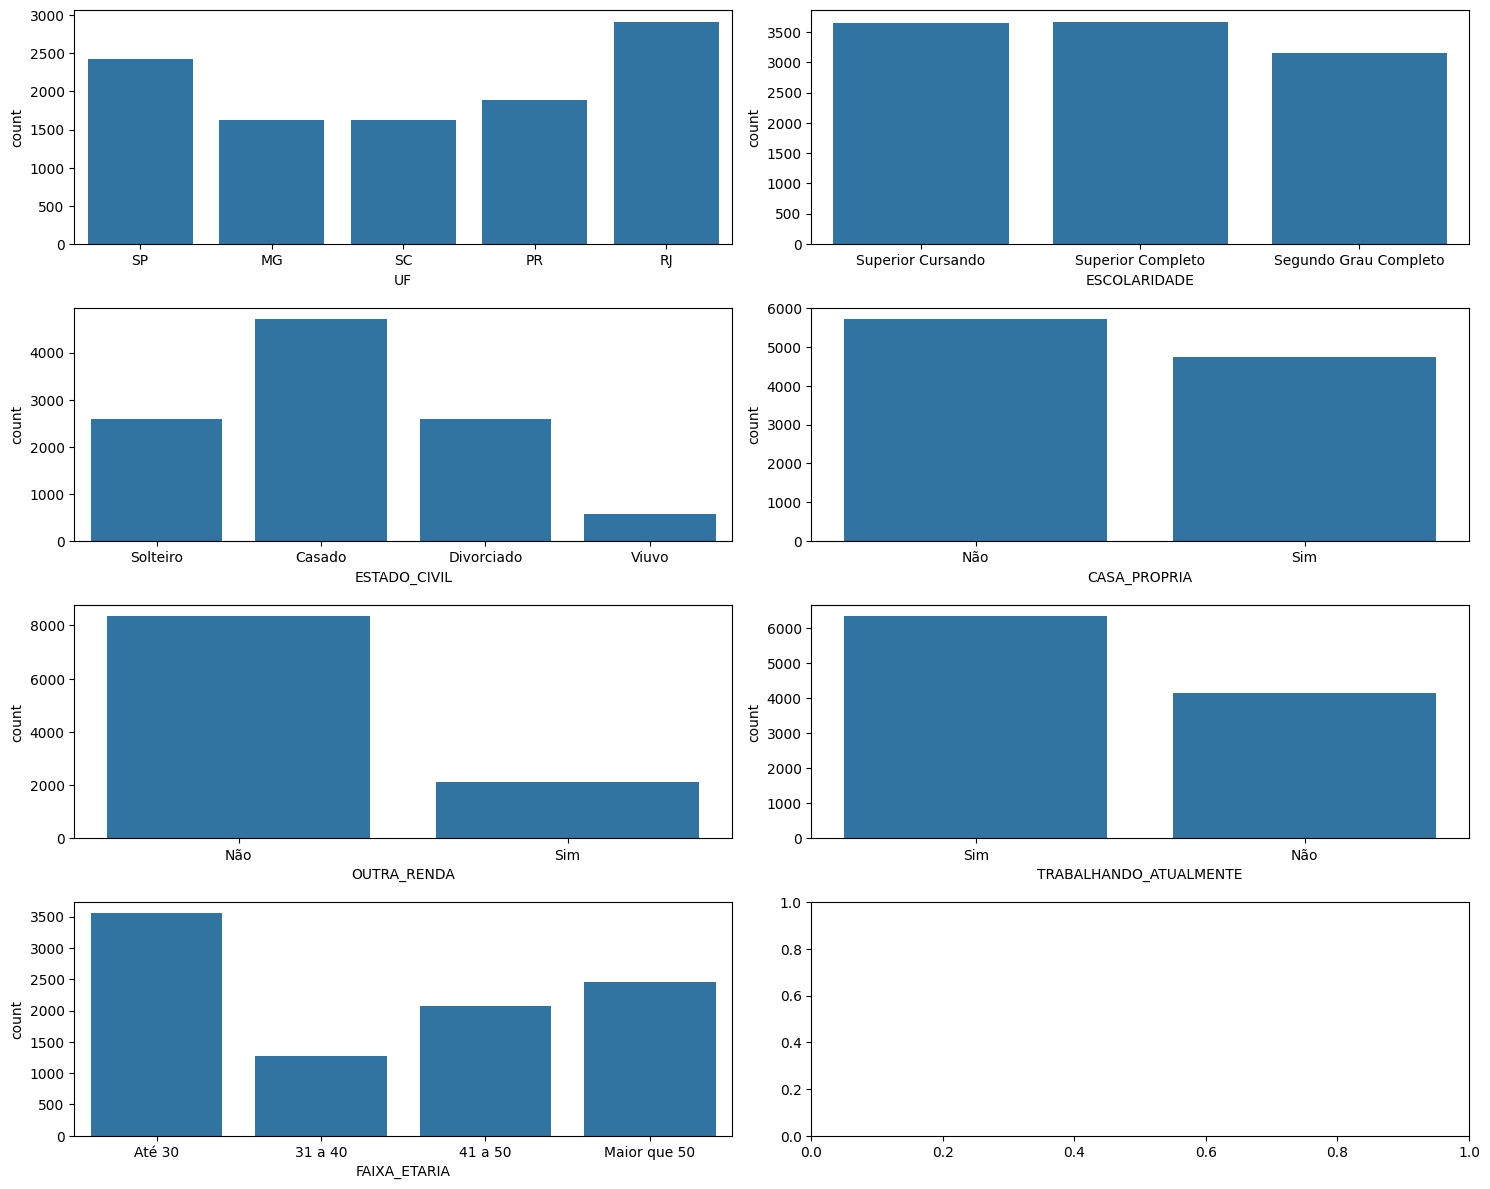

In [33]:
plt.rcParams['figure.figsize'] = [15.00, 12.00]
plt.rcParams['figure.autolayout'] = True

f, axes = plt.subplots(4, 2)

row = 0
column = 0

for i in categorical_variables:
    sns.countplot(data = df, x=i, ax=axes[row][column])
    column += 1
    if column == 2:
        row += 1
        column = 0

plt.show()

# **Pre processing**

In [34]:
lb = LabelEncoder()

df['FAIXA_ETARIA'] = lb.fit_transform(df['FAIXA_ETARIA'])
df['OUTRA_RENDA'] = lb.fit_transform(df['OUTRA_RENDA'])
df['TRABALHANDO_ATUALMENTE'] = lb.fit_transform(df['TRABALHANDO_ATUALMENTE'])
df['ESTADO_CIVIL'] = lb.fit_transform(df['ESTADO_CIVIL'])
df['CASA_PROPRIA'] = lb.fit_transform(df['CASA_PROPRIA'])
df['ESCOLARIDADE'] = lb.fit_transform(df['ESCOLARIDADE'])
df['UF'] = lb.fit_transform(df['UF'])

df.dropna(inplace=True)

In [35]:
df.head(200)

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE,FAIXA_ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,12.000000,2
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,18.000000,2
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,23.000000,2
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.0,0,0,28.666667,2
4,2,28,1,1,2,0,1,370000,0,0,30,1,6100.0,1,35000,34.166667,2
5,4,30,0,1,0,0,0,0,0,0,14,1,3100.0,2,40000,39.666667,2
6,0,32,2,2,1,1,1,185000,1,3000,19,1,6800.0,0,0,45.166667,0
7,3,35,1,2,1,1,2,450000,1,2400,25,1,22000.0,1,150000,50.666667,0
8,1,42,0,0,0,0,0,0,0,0,48,1,4500.0,2,28000,56.166667,1
9,2,45,2,0,0,0,0,0,0,0,120,0,9800.0,0,0,61.666667,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10476 non-null  int64  
 1   IDADE                       10476 non-null  int64  
 2   ESCOLARIDADE                10476 non-null  int64  
 3   ESTADO_CIVIL                10476 non-null  int64  
 4   QT_FILHOS                   10476 non-null  int64  
 5   CASA_PROPRIA                10476 non-null  int64  
 6   QT_IMOVEIS                  10476 non-null  int64  
 7   VL_IMOVEIS                  10476 non-null  int64  
 8   OUTRA_RENDA                 10476 non-null  int64  
 9   OUTRA_RENDA_VALOR           10476 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10476 non-null  int64  
 12  ULTIMO_SALARIO              10476 non-null  float64
 13  QT_CARROS                   104

In [37]:
target = df.iloc[:,15:16]

In [38]:
predictables =  df.copy()

del predictables['SCORE']

predictables.head()

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,FAIXA_ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,2
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,2
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,2
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.0,0,0,2
4,2,28,1,1,2,0,1,370000,0,0,30,1,6100.0,1,35000,2


In [39]:
X_train, X_test, y_train, y_test = train_test_split(predictables, target, test_size=0.3, random_state=42)

sc = MinMaxScaler()
normalized_X_train = sc.fit_transform(X_train)
normalized_X_test = sc.transform(X_test)

In [42]:
model = LinearRegression(fit_intercept=True)

model = model.fit(normalized_X_train, y_train)

In [43]:
r2_score(y_test, model.fit(normalized_X_train, y_train).predict(normalized_X_test))

0.7994175749546185

# **Example**

In [44]:
UF = 2
IDADE = 42
ESCOLARIDADE = 1
ESTADO_CIVIL = 2
QT_FILHOS = 1
CASA_PROPRIA = 1
QT_IMOVEIS = 1
VL_IMOVEIS = 500000
OUTRA_RENDA = 1
OUTRA_RENDA_VALOR = 2400
TEMPO_ULTIMO_EMPREGO_MESES = 6
TRABALHANDO_ATUALMENTE = 1
ULTIMO_SALARIO = 7400.0
QT_CARROS = 4
VALOR_TABELA_CARROS = 80000
FAIXA_ETARIA = 3

data = [UF, IDADE, ESCOLARIDADE, ESTADO_CIVIL, QT_FILHOS, CASA_PROPRIA, QT_IMOVEIS,
        VL_IMOVEIS, OUTRA_RENDA, OUTRA_RENDA_VALOR, TEMPO_ULTIMO_EMPREGO_MESES,
        TRABALHANDO_ATUALMENTE, ULTIMO_SALARIO, QT_CARROS, VALOR_TABELA_CARROS, FAIXA_ETARIA]

X = np.array(data).reshape(1, -1)
X = sc.transform(X)

print(f'credit score: {model.predict(X)}')

credit score: [[65.77722807]]
